In [11]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2


In [12]:
# Loading images 
img = cv2.imread("./inputs/P2/img.png")
msg = cv2.imread("./inputs/P2/msg.png",0)

# resize msg image
a,b = img.shape[0:2]
msg = cv2.resize(msg,[b,a])

# binarize image
(thresh, im_bw) = cv2.threshold(msg, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
thresh = 127
msg = cv2.threshold(msg, thresh, 255, cv2.THRESH_BINARY)[1]
cv2.imwrite('./outputs/P02-bc/binary_msg.png', msg)

print(msg.shape,img.shape)


(1200, 1600) (1200, 1600, 3)


In [13]:
# check to being binary
np.unique(msg)

array([  0, 255], dtype=uint8)

In [14]:
def Decode(en_img):
    # like given pseudo-code
    msg = np.zeros_like(en_img)
    img_r = en_img[:,:,2]
    img_b = en_img[:,:,0]
    img_mid = abs(img_r - img_b)
    
    for row in range(img_mid.shape[0]):
        for col in range(img_mid.shape[1]):
            pix = img_mid[row,col]
            if pix%2==0:
                # use 255 brightness level as one
                msg[row,col] = 255             
            else:
                msg[row,col] = 0 
                
    plt.imshow( cv2.cvtColor(msg,cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
    return msg
 
# Encode message into image              
def Encode(img,msg):
    #check if sizes are equal
    if img.shape[0:2] !=  msg.shape[0:2]:
        raise ValueError("Shape must be equal")
    
    # like decode algorithm, select blue and red channel and calclate mid
    img_r = img[:,:,2]
    img_b = img[:,:,0]
    img_mid = abs(img_r - img_b)
    
    # scroll all pixels entire image
    for row in range(msg.shape[0]):
        for col in range(msg.shape[1]):
            
            # check if a pixel can be decoded based on current values
            # if is not possible, increase or decrease one unit to changing odd to even and even to odd
            if msg[row,col] == 255 and img_mid[row,col]%2 != 0:
                if img[row,col,2] - 1 > 0:
                    img[row,col,2] -= 1
                elif  img[row,col,2] + 1 < 255:
                    img[row,col,2] += 1
                    

            elif msg[row,col] == 0 and img_mid[row,col]%2==0:
                if img[row,col,2] - 1 > 0:
                    img[row,col,2] -= 1
                elif  img[row,col,2] + 1 < 255:
                    img[row,col,2] += 1

                
    plt.imshow( cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()      
    return  img  
    

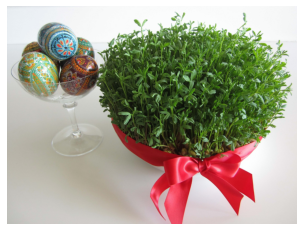

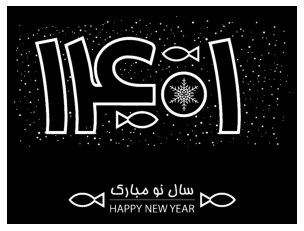

True

In [15]:
encoded_img = Encode(img,msg)
cv2.imwrite('./outputs/P02-bc/encoded_img.png', encoded_img)
decoded_img = Decode(encoded_img)
cv2.imwrite('./outputs/P02-bc/decoded_img.png', decoded_img)